# Structure Imagery Script
##### This script generates a map image for one potential structure. The functions are all in the python script named "structureimagery". This script is first imported, next the single map script is ran, generating the map image.

* ## Configure Jupyter to Work with ArcPy and R
Watch the video below for instructions on one way to configure Jupyter Notebook to work with ArcPy and R. The text that follows the video are my written steps given by this video. 

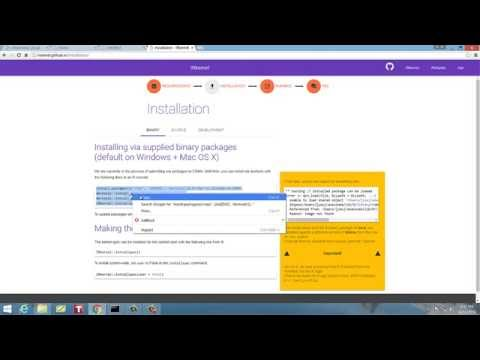

In [12]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('wQk-0xETGbc')

* ### Configure Anaconda for use with DS
Follow the two steps below, first entering code and inserting the version of each that you have, then you will enter Y for yes to install packages

   #### Open Administrator Anaconda command prompt , type codes below to install packages 
1.) Type: conda create -n arc105 python = ENTER VERSION numpy = ENTER VERSION matplotlib = ENTER VERSION pyparsingxlrd xlwt

2.) Type: Y

* ### Configure Anaconda to See ArcGIS and visa versa
##### This is what I did step by step

#### 1.	Find Site Packages Folder inside hard disk folder when ArcGIS installs its Python version
             i.	C:\Python27\ArcGISx6410.5\Lib\site-packages
#### 2.	Copy Desktop pth file 
             i.	Desktop10.5, mine was DTBGGP64.pth 
#### 3.	Open Notepad
             i.	Paste file path to site packages folder in anaconda 
                     1.	C:\Users\bdangel\AppData\Local\Continuum\anaconda2\envs\arc105\Lib\site-packages
             ii.	Copy the pathfile and paste into Notebook
#### 4.	Go back to folder that contains desktop10.5 path file
             i.	DTBGGP64.pth
             ii.	Copy this .pth file and paste into anaconda installation folder 
                     1.	C:\Users\bdangel\AppData\Local\Continuum\anaconda2
#### 5.	Test if Jupyter can see ArcPy
             i.	Open Command Prompt
             ii.	$ activate arc105
             iii.	$ jupyter notebook – this opens jupyter notebook
#### 6.	Start a new notebook, type import arcpy


## Structure Imagery Functions
The functions below are used in the **single_map_script** which is a script that generates a map image of one potential structure. 

In [ ]:
from os import path
import arcpy

arcpy.env.workspace = arcpy.env.scratchGDB

###  Locate map files 

In [ ]:
def get_mxd(str_path_mxd, str_file_mxd):
    if path.isfile(str_path_mxd + "\\" + str_file_mxd):
        mxd = arcpy.mapping.MapDocument(str_path_mxd + "\\" + str_file_mxd)
    else:
        mxd = "can't find file " + str_file_mxd + " in folder " + str_path_mxd
    return mxd

### Locate dataframe that includes potential structure layer 

In [3]:
def get_df(mxd_cur, str_df_name):
    df_got = arcpy.mapping.ListDataFrames(mxd_cur, str_df_name)[0]
    return df_got

### Return Python list of potential structures layer 

In [16]:
def get_sel_layer(mxd_cur, str_poly, df_cur):
    lyr = arcpy.mapping.ListLayers(mxd_cur, str_poly, df_cur)[0]                   
    return lyr

### Return a set of sorted, unique field values 

In [4]:
def unique_values(table, field):
   with arcpy.da.SearchCursor(table, field) as cursor:
        return sorted({row[0] for row in cursor})

### Turn off visibility for all layers 

In [5]:
def make_not_vis(df):
    for lyr in df:
        if lyr.isGroupLayer:
            for lyr_g in lyr.isGroupLayer:
                lyr_g.visible = False
        else:
            lyr.visible = False

### Turn on visibility for selected layer(s)

In [6]:
def make_vis(mxd_cur, df, list_lyr):
    for str_lyr in list_lyr:
        lyr_cur = arcpy.mapping.ListLayers(mxd_cur, str_lyr, df)[0]
        lyr_cur.visible = True
    arcpy.RefreshTOC()
    arcpy.RefreshActiveView()


### Create temporary layer that has been selected 

In [7]:
def make_sel(query, str_sel_lyr):
    lyr_temp_in = arcpy.CreateScratchName(workspace=arcpy.env.scratchGDB)                                  
    lyr_temp_sel = arcpy.CreateScratchName(workspace=arcpy.env.scratchGDB)                                 
    arcpy.MakeFeatureLayer_management(str_sel_lyr, lyr_temp_in)                                             
    arcpy.Select_analysis(lyr_temp_sel, lyr_temp_in, query)                                                 
    return lyr_temp_sel

### Loop through all structures and generate map images

In [8]:
def gen_map_images(my_list, sel_lyr, df_zoom, mxd_cur, str_path_export, str_file_image_export_prefix):
    arcpy.env.overwriteOutput = True
    for curFID in my_list:
        query = '"FID" = {}'.format(curFID)
        str_new_lyr = make_sel(query, sel_lyr.dataSource)                              
        add_lyr = arcpy.mapping.Layer(str_new_lyr)
        arcpy.mapping.AddLayer(df_zoom, add_lyr, "TOP")
        df_zoom.panToExtent(add_lyr.getSelectedExtent())
        add_lyr.visible = True
        arcpy.RefreshTOC()
        arcpy.RefreshActiveView()
        arcpy.mapping.ExportToPNG(map_document=mxd_cur, out_png=str_path_export + '\\' + str_file_image_export_prefix + '{}'.format(curFID) + '_ext_pg.png')
        arcpy.mapping.RemoveLayer(df_zoom, add_lyr)
        arcpy.Delete_management(add_lyr)
        arcpy.RefreshTOC()
        arcpy.RefreshActiveView()
        del query, str_new_lyr, add_lyr

### Generate map image for one structure 

In [22]:
def gen_map_image(curFID, sel_lyr, df_zoom, mxd_cur):
    arcpy.env.overwriteOutput = True
    query = "\"FID\" = {}".format(curFID)                                                                            
    str_new_lyr = make_sel(query, sel_lyr.dataSource)                             
    add_lyr = arcpy.mapping.Layer(str_new_lyr)                                     
    arcpy.mapping.AddLayer(df_zoom, add_lyr, "BOTTOM")                              
    # df_zoom.panToExtent(add_lyr.getSelectedExtent())
    add_lyr.visible = True
    arcpy.RefreshTOC()
    arcpy.RefreshActiveView()
    # arcpy.mapping.ExportToPNG(map_document=mxd_cur, out_png=str_path_export + '\\' + str_file_image_export_prefix + '{}'.format(curFID) + '_ext_pg.png')
    arcpy.mapping.RemoveLayer(df_zoom, add_lyr)         
    arcpy.Delete_management(add_lyr)                    
    arcpy.RefreshTOC()
    arcpy.RefreshActiveView()


Here I added the Single Map script. First I enetered the variables. I then added the functions used individually. Next I would like to figure out how to show the map image in the notebok.

# Single Map Script 

### Variables 

In [23]:
str_path_mxd = r'\\deqhq1\tmdl\tmdl_wr\midcoast\GIS\BacteriaTMDL\UpperYaquinaRiver\MapDocs'
str_file_mxd = r'Upper Yaquina Near-Stream Structures (scratch).mxd'
str_df_zoom_name = r'Zoom to Feature'
str_df_state_name = r'Overall Watershed'
str_strc_cent = r'PointPotentialStructureCentroids'
str_strc_poly = r'Potential Structures'
str_strm_line = r'NHD Flowlines'
ortho_bm = r'ortho_1-1_1n_s_or041_2014_1.sid'                                                                      

# str_path_export = r'\\deqhq1\tmdl\tmdl_wr\midcoast\GIS\BacteriaTMDL\UpperYaquinaRiver\python\structure-imagery\images'
# str_file_image_export_prefix = 'strt_'

curFID = 36

### Locate .mxd file 

In [24]:
mxd_cur = get_mxd(str_path_mxd, str_file_mxd)

### Locate dataframe containing potential structure layer 

In [25]:
df_zoom = get_df(mxd_cur, str_df_zoom_name)

### Return potential structure layer 

In [26]:
sel_lyr = get_sel_layer(mxd_cur, str_strc_cent, df_zoom)

### Turn off visibility for all layers 

In [27]:
make_not_vis(df_zoom)

### Turn on visibility for selected layers

In [28]:
make_vis(mxd_cur, df_zoom, [str_strc_poly, str_strc_cent, ortho_bm])

### Generate map image for selected structure 

In [31]:
gen_map_image(curFID, sel_lyr, df_zoom, mxd_cur)